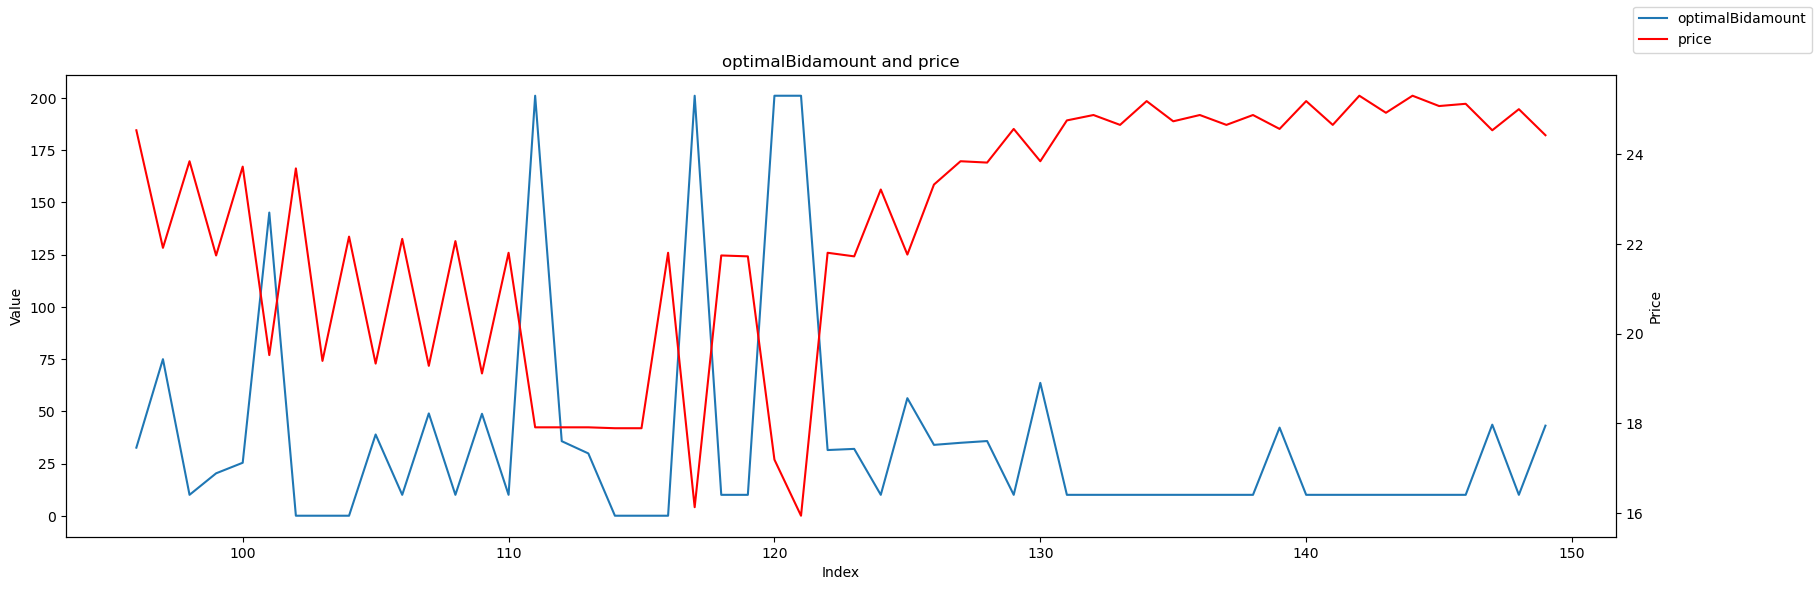

In [4]:
# comparing price and bid amount from seperate optimization

import pandas as pd
import matplotlib.pyplot as plt

# Import the CSV file
df = pd.read_csv("/Users/kanankhasmammadov/Desktop/Thesis - Electrolyzer market participation/flexABLE_w_electrolyzer/Data_processing/optimizedBidAmount.csv")

df_sliced = df[96:150]

fig, ax1 = plt.subplots(figsize=(20, 6))

ax1.plot(df_sliced['optimalBidamount'], label='optimalBidamount')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.set_title('optimalBidamount and price')

ax2 = ax1.twinx()
ax2.plot(df_sliced['price'], color='red', label='price')
ax2.set_ylabel('Price')

fig.legend(loc='upper right')
plt.show()


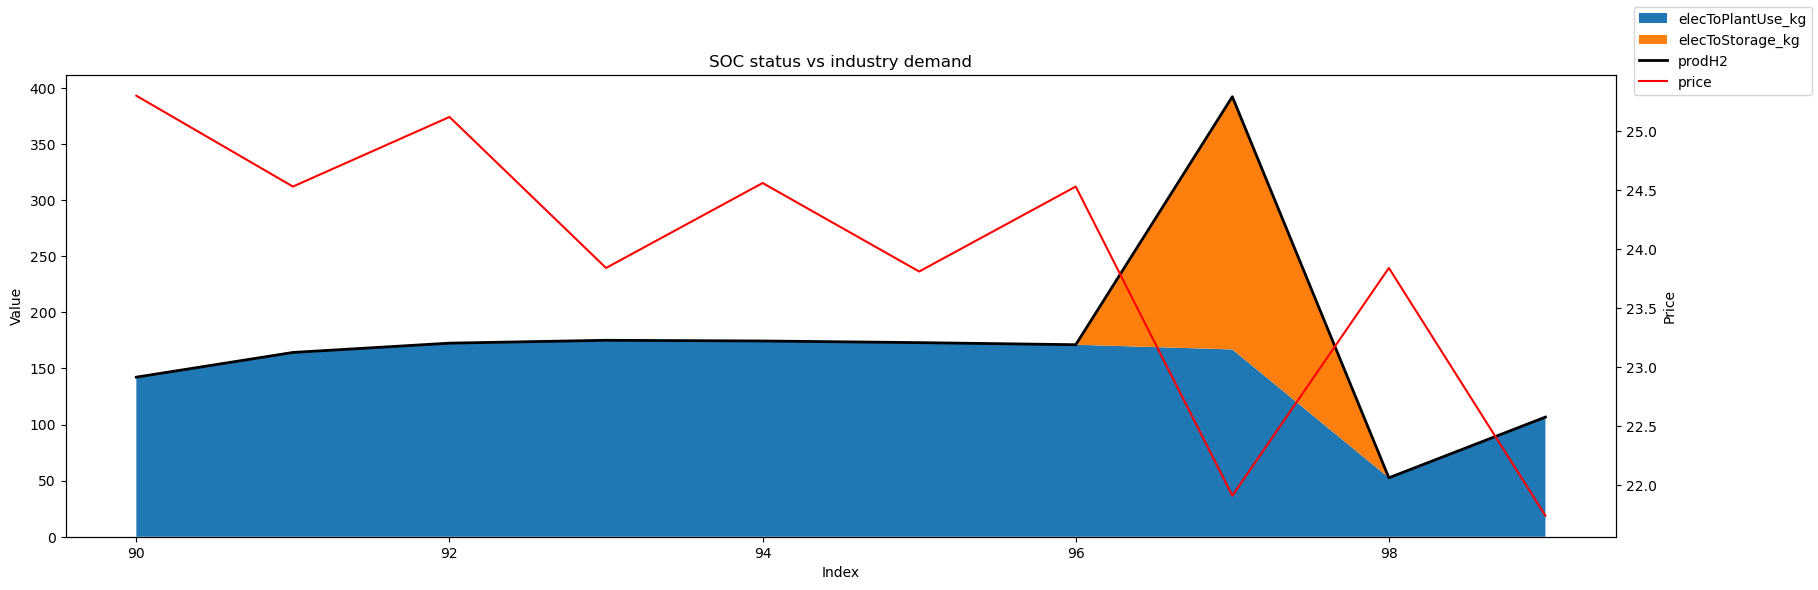

In [11]:
fig, ax1 = plt.subplots(figsize=(20, 6))
df_sliced = df[90:100]

ax1.stackplot(df_sliced.index, df_sliced['elecToPlantUse_kg'], df_sliced['elecToStorage_kg'], labels=['elecToPlantUse_kg', 'elecToStorage_kg'])
ax1.plot(df_sliced.index, df_sliced['prodH2'], color='black', linewidth=2, label='prodH2')

ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.set_title('Cumulative Produced Hydrogen')

# Add the price column as a red line on the secondary axis
ax2 = ax1.twinx()
ax2.plot(df_sliced.index, df_sliced['price'], color='red', label='price')
ax2.set_ylabel('Price')

fig.legend(loc='upper right')
plt.show()


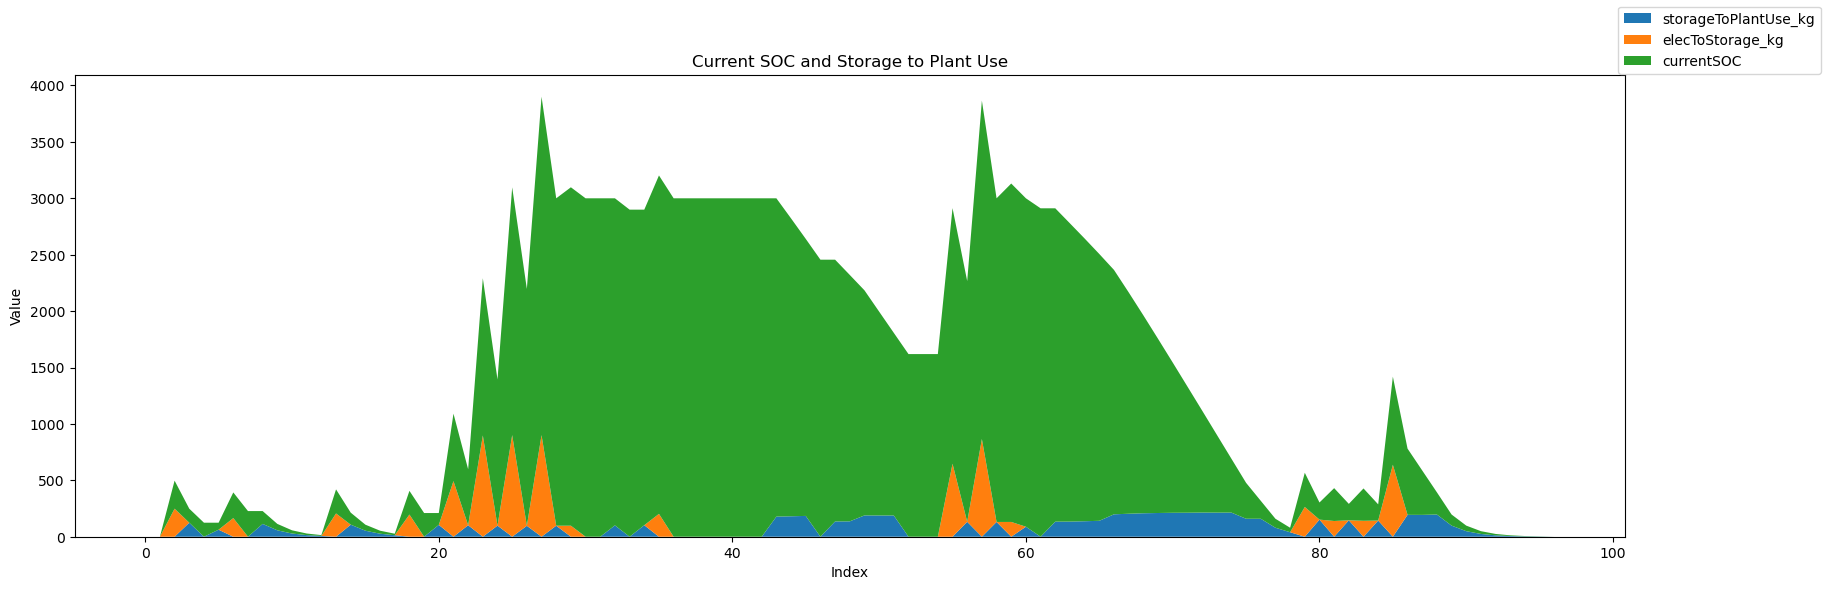

In [12]:
import matplotlib.pyplot as plt
df_sliced = df[0:97]

fig, ax = plt.subplots(figsize=(20, 6))

ax.stackplot(df_sliced.index, df_sliced['storageToPlantUse_kg'], df_sliced['elecToStorage_kg'], df_sliced['currentSOC'],  labels=['storageToPlantUse_kg', 'elecToStorage_kg', 'currentSOC' ])

ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Current SOC and Storage to Plant Use')

fig.legend(loc='upper right')
plt.show()



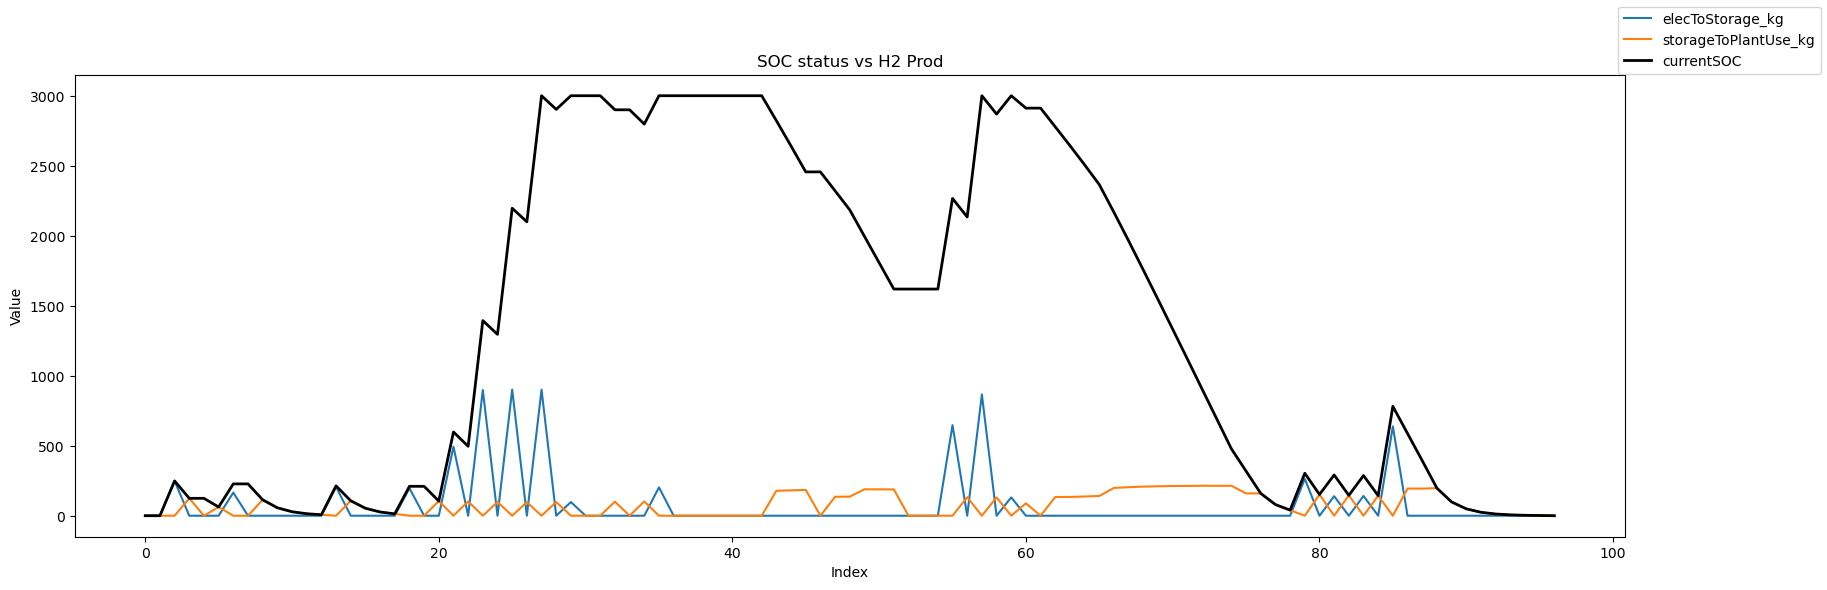

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
df_sliced = df[0:97]

ax.plot(df_sliced['elecToStorage_kg'], label='elecToStorage_kg')
ax.plot(df_sliced['storageToPlantUse_kg'], label='storageToPlantUse_kg')
ax.plot(df_sliced['currentSOC'], color='black', linewidth=2, label='currentSOC')

ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('SOC status vs H2 Prod')

fig.legend(loc='upper right')
plt.show()


[19895.107745, 20062.273817499998, 18346.329227499995, 33474.0029575, 38473.377907500006, 36152.290115, 33866.775079999985, 28813.584797499996, 26110.87655499999, 19177.073710000004]
[21345.47409625715, 21592.82831074286, 20753.443400485718, 37511.369678357136, 41708.40002858571, 39195.97720075716, 36542.069618057125, 32362.915241957133, 26918.134155471438, 22151.969819571423]


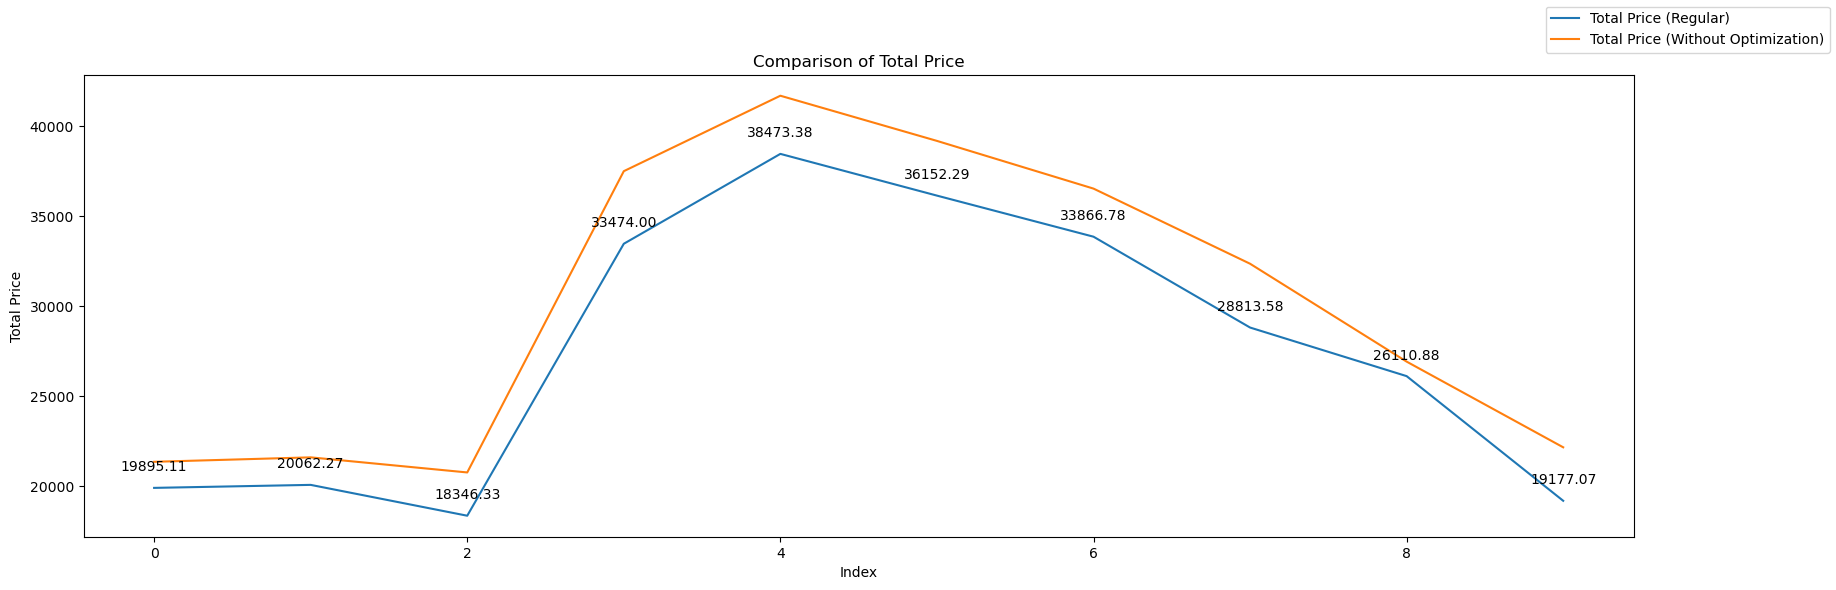

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
total_price = []
total_price_wo_opt = []
df = pd.read_csv("/Users/kanankhasmammadov/Desktop/Thesis - Electrolyzer market participation/flexABLE_w_electrolyzer/Data_processing/optimizedBidAmount.csv")

optimalBidamount = df["optimalBidamount"] * 0.25
industry_demand = df["industry_demand"] * 0.03333/0.7
optimalBidamount = optimalBidamount[0:960]
industry_demand = industry_demand[0:960]

foresight = 96
PFC = df["price"]
PFC = PFC[0:960]
interval_count = len(PFC) // foresight
for interval in range(interval_count):
    start_idx = interval * foresight #start point for time interval
    end_idx = (interval + 1) * foresight #start point for time interval
    interval_bidQuantity_reg = pd.to_numeric(optimalBidamount[start_idx:end_idx]) # convert to numeric
    interval_bidQuantity_wo_opt = pd.to_numeric(industry_demand[start_idx:end_idx]) # convert to numeric
    interval_price = pd.to_numeric(PFC[start_idx:end_idx]) # convert to numeric
    interval_total_price = sum((qty * p for qty, p in zip(interval_bidQuantity_reg, interval_price)))
    interval_total_price_wo_opt = sum((qty * p for qty, p in zip(interval_bidQuantity_wo_opt, interval_price)))
    total_price.append(interval_total_price)
    total_price_wo_opt.append(interval_total_price_wo_opt)
    
fig, ax = plt.subplots(figsize=(20, 6))
print(total_price)
print(total_price_wo_opt)

ax.plot(total_price, label='Total Price (Regular)')
ax.plot(total_price_wo_opt, label='Total Price (Without Optimization)')

ax.set_xlabel('Index')
ax.set_ylabel('Total Price')
ax.set_title('Comparison of Total Price')
fig.legend(loc='upper right')

# Add data labels with vertical spacing
for i, price in enumerate(total_price):
    ax.annotate(f'{price:.2f}', (i, price), textcoords="offset points", xytext=(0,10), ha='center', va='bottom')



25710.88963774289 Price difference


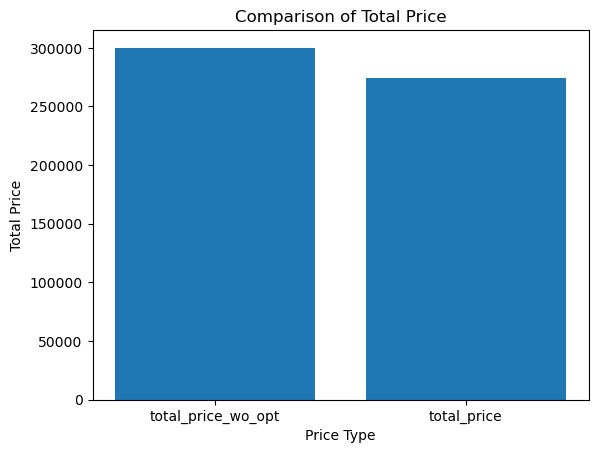

In [30]:
import numpy as np
#Price check
sum_total_price_wo_opt = np.sum(total_price_wo_opt)
sum_total_price = np.sum(total_price)
difference = sum_total_price_wo_opt-sum_total_price


print(difference, 'Price difference')

import matplotlib.pyplot as plt

# Define the x-axis labels
labels = ['total_price_wo_opt', 'total_price']

# Define the data values
values = [sum_total_price_wo_opt, sum_total_price]

# Create the bar plot
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Price Type')
plt.ylabel('Total Price')
plt.title('Comparison of Total Price')

# Display the plot
plt.show()
